* data: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
* reference: https://www.kaggle.com/code/artyomkolas/hw-anomaly-detection
* imbalance dataset: create more data https://medium.com/sfu-cspmp/surviving-in-a-random-forest-with-imbalanced-datasets-b98b963d52eb
* PCA: https://towardsdatascience.com/detect-anomalies-in-telemetry-data-using-principal-component-analysis-98d6dc4bf843
* SVM one class:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
#import ColumnTransformer to transform different types of variables: categorical or continuous
from sklearn.compose import ColumnTransformer

import numpy as np

#PCA
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

#One ClassSVM
from sklearn.svm import OneClassSVM
from numpy import where

In [2]:
df=pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df[:20]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [5]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
len(df)

284807

In [7]:
len(df[df['Class']==1])

492

### EDA, Data preprocessing

Text(0.5, 1.0, 'Value Counts of Class')

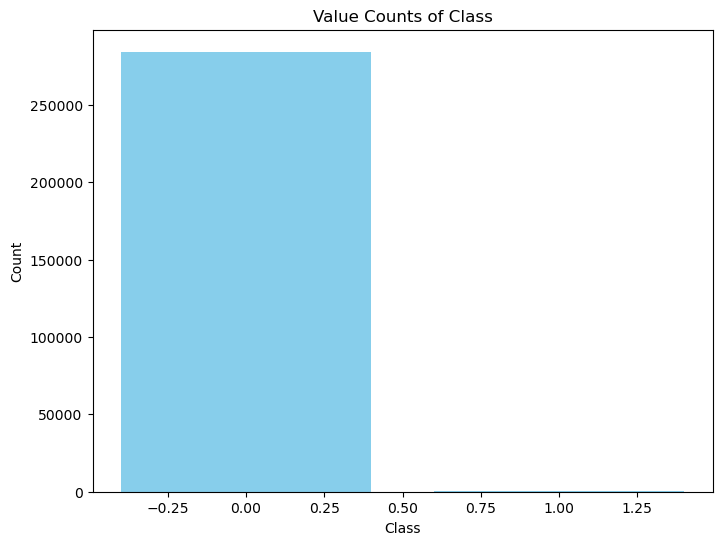

In [8]:
class_counts=df['Class'].value_counts()
fig, ax=plt.subplots(figsize=(8,6))
ax.bar(class_counts.index, class_counts.values, color='skyblue')
ax.set_xlabel('Class')
ax.set_ylabel('Count')
ax.set_title('Value Counts of Class')

In [9]:
# creating charts
cols = ['Non-fraudulent','Fraudulent']
var_to_plot = ['V1','V2','V3','V4','V5','V6',"V7","V8",'V9','V10']
types = df[var_to_plot].dtypes

In [10]:
types

V1     float64
V2     float64
V3     float64
V4     float64
V5     float64
V6     float64
V7     float64
V8     float64
V9     float64
V10    float64
dtype: object

In [11]:
types['V1']

dtype('float64')

In [12]:
df[df['Class']==0]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


#### Check V1

Text(0.5, 1.0, 'Distribution of V1 in Class 0')

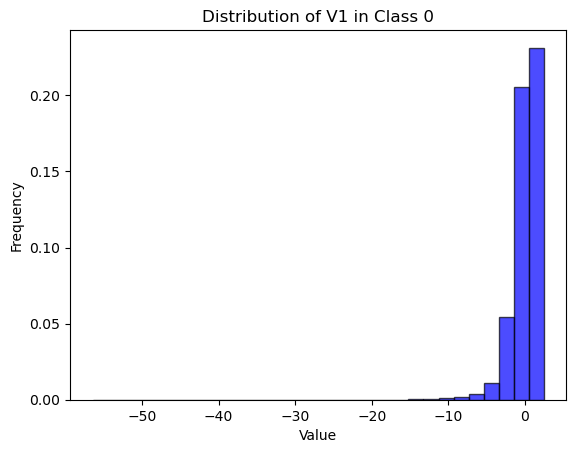

In [13]:
# Create a histogram
# when density=True is used in plt.hist(), the y-axis can represent the probability density instead of raw frequencies

# Create a histogram
plt.hist(df[df['Class']==0]['V1'], bins=30, density=True, alpha=0.7, color='blue', edgecolor='black')

# Add labels and a title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of V1 in Class 0')

Text(0.5, 1.0, 'Distribution of V1 in Class 1')

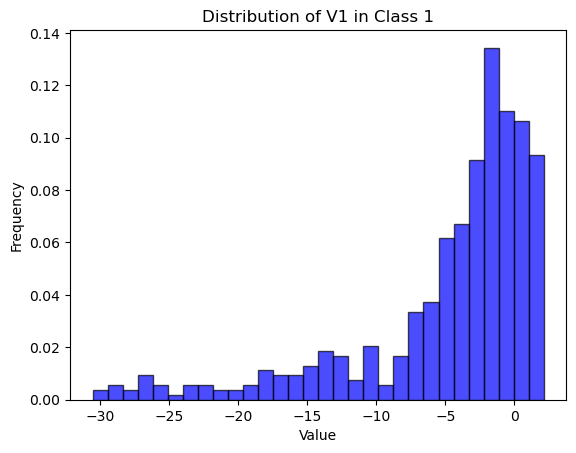

In [14]:
# Create a histogram
plt.hist(df[df['Class']==1]['V1'], bins=30, density=True, alpha=0.7, color='blue', edgecolor='black')

# Add labels and a title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of V1 in Class 1')

#### V2

Text(0.5, 1.0, 'Distribution of V2 in class 0')

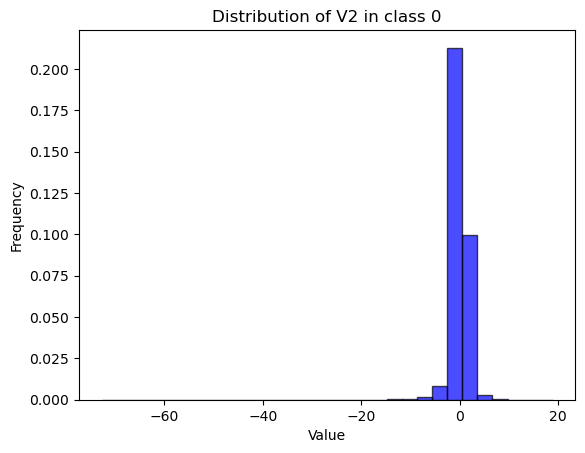

In [15]:
# Create a histogram
plt.hist(df[df['Class']==0]['V2'], bins=30, density=True, alpha=0.7, color='blue', edgecolor='black')

# Add labels and a title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of V2 in class 0')

Text(0.5, 1.0, 'Distribution of V2 in class 1')

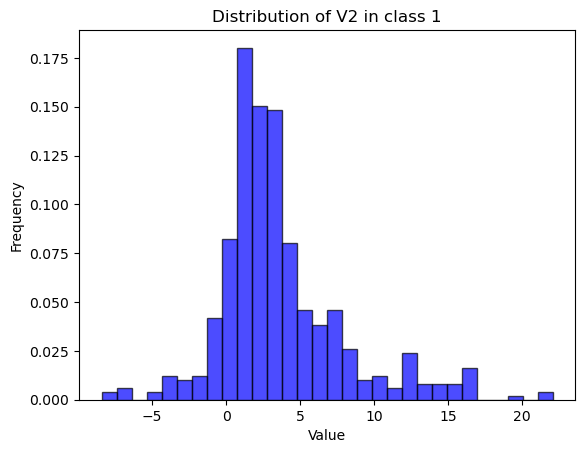

In [16]:
# Create a histogram
plt.hist(df[df['Class']==1]['V2'], bins=30, density=True, alpha=0.7, color='blue', edgecolor='black')

# Add labels and a title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of V2 in class 1')

#### chekc amount

Text(0.5, 1.0, 'Distribution of Amount in Class 1')

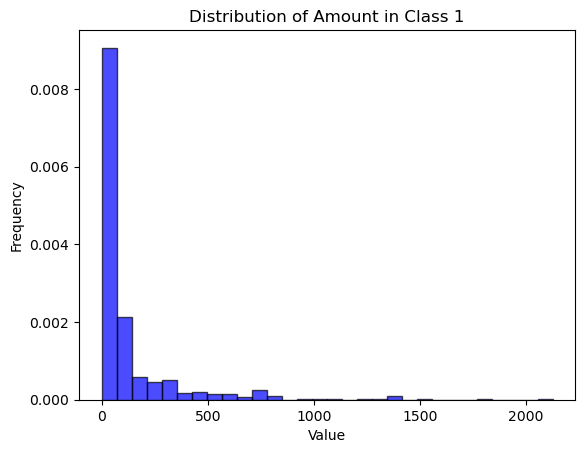

In [17]:
# Create a histogram
plt.hist(df[df['Class']==1]['Amount'], bins=30, density=True, alpha=0.7, color='blue', edgecolor='black')

# Add labels and a title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Amount in Class 1')

Text(0.5, 1.0, 'Distribution of Amount in Class 0')

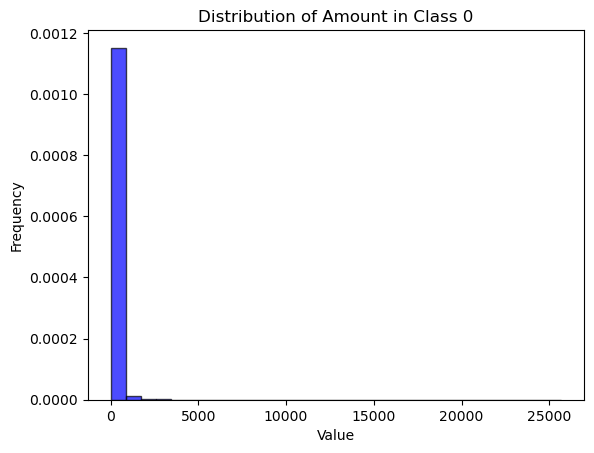

In [18]:
# Create a histogram
plt.hist(df[df['Class']==0]['Amount'], bins=30, density=True, alpha=0.7, color='blue', edgecolor='black')

# Add labels and a title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Amount in Class 0')

## 1. run random forest

#### 1. run Random forest with all features

In [85]:
#shuffle and split the dataset into training and test sets, using stratified for imbalanced dataset
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.3,random_state=1)
# get the train and test sets
for train_index, test_index in split.split(df, df["Class"]):
    train_set = df.iloc[train_index]
    test_set  = df.iloc[test_index]

In [86]:
#get labels and features for both test and train sets 
y_train = train_set["Class"]
x_train = train_set.drop(["Class"],axis=1)
y_test  = test_set["Class"]
x_test = test_set.drop(["Class"],axis=1)

In [87]:
#Standardization or scaling datta
#scaler=StandardScaler()
scaler=MinMaxScaler()
x_train_=pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
x_test=pd.DataFrame(scaler.fit_transform(x_test), columns=x_test.columns)

In [88]:
rf_cl=RandomForestClassifier(max_depth=10, n_estimators=100, random_state=0)
rf_cl.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, random_state=0)

In [89]:
#Make predictions and evaluate the model
y_pred = rf_cl.predict(x_test)

In [90]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [91]:
y_pred.sum()

0

In [92]:
max(y_pred)

0

In [93]:
sum(y_test)

148

In [94]:
confusion_mat = confusion_matrix(y_test, y_pred)
confusion_mat 

array([[85295,     0],
       [  148,     0]], dtype=int64)

#### 2. Run RF with 5 features, not include time

In [95]:
# Selecting a range of columns from 1 to 6 (exclusive) and combining with the column -2 (second to last column)
selected_columns = df.iloc[:, 1:6]  # Select columns 1 to 5
combined_column = df.iloc[:, -2:]  # Select the second to last column

# Combining the selected columns and the -2 column
df_rf = pd.concat([selected_columns, combined_column], axis=1)

df_rf.head()

,V1,V2,V3,V4,V5,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,69.99,0


In [96]:
#shuffle and split the dataset into training and test sets, using stratified for imbalanced dataset
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.3,random_state=1)
# get the train and test sets
for train_index, test_index in split.split(df, df["Class"]):
    train_set = df.iloc[train_index]
    test_set  = df.iloc[test_index]

In [97]:
#get labels and features for both test and train sets 
y_train = train_set["Class"]
x_train = train_set.drop(["Class"],axis=1)
y_test  = test_set["Class"]
x_test = test_set.drop(["Class"],axis=1)

In [98]:
#Standardization or scaling datta
#scaler=StandardScaler()
scaler=MinMaxScaler()
x_train_=pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
x_test=pd.DataFrame(scaler.fit_transform(x_test), columns=x_test.columns)

In [99]:
rf_cl=RandomForestClassifier(max_depth=10, n_estimators=100, random_state=0)
rf_cl.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, random_state=0)

In [100]:
#Make predictions and evaluate the model
y_pred = rf_cl.predict(x_test)
confusion_mat = confusion_matrix(y_test, y_pred)
confusion_mat 

array([[85295,     0],
       [  148,     0]], dtype=int64)

## 2. Using PCA and run random forest

In [19]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [20]:
df_ = df.drop(['Time'], axis=1)

#shuffle and split the dataset into training and test sets, using stratified for imbalanced dataset
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.3,random_state=1)
# get the train and test sets
for train_index, test_index in split.split(df_, df_["Class"]):
    train_set = df_.iloc[train_index]
    test_set  = df_.iloc[test_index]


In [21]:
#get labels and features for both test and train sets 
y_train = train_set["Class"]
x_train = train_set.drop(["Class"],axis=1)
y_test  = test_set["Class"]
x_test = test_set.drop(["Class"],axis=1)

In [104]:
#Standardization or scaling datta
#scaler=StandardScaler()
scaler=MinMaxScaler()
x_train_=pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
x_test=pd.DataFrame(scaler.fit_transform(x_test), columns=x_test.columns)

In [105]:
#fit pca
pca = PCA(n_components = 5, random_state=0)
 
x_train_pca = pca.fit_transform(x_train)
pca.explained_variance_ratio_


array([9.99528583e-01, 6.06747531e-05, 3.94907006e-05, 3.57741145e-05,
       3.25483955e-05])

In [106]:
x_test_pca = pca.transform(x_test)
pca.explained_variance_ratio_


array([9.99528583e-01, 6.06747531e-05, 3.94907006e-05, 3.57741145e-05,
       3.25483955e-05])

This means that 99% of the data can be explained using the first PC

In [107]:
rf_cl=RandomForestClassifier(max_depth=10, n_estimators=100, random_state=0)
rf_cl.fit(x_train_pca,y_train)

RandomForestClassifier(max_depth=10, random_state=0)

In [108]:
#Make predictions and evaluate the model
y_pred = rf_cl.predict(x_test_pca)
confusion_mat = confusion_matrix(y_test, y_pred)
confusion_mat 

array([[85295,     0],
       [  148,     0]], dtype=int64)

### using this reference: PCA unsupervised model 
https://github.com/jeffprosise/Machine-Learning/blob/master/Fraud%20Detection%20(Unsupervised).ipynb

In [22]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [23]:
# Separate the samples by class
legit = df[df['Class'] == 0]
fraud = df[df['Class'] == 1]

# Drop the "Time" and "Class" columns
legit = legit.drop(['Time', 'Class'], axis=1)
fraud = fraud.drop(['Time', 'Class'], axis=1)

In [24]:
pca = PCA(n_components=26, random_state=0)
legit_pca = pd.DataFrame(pca.fit_transform(legit), index=legit.index)
fraud_pca = pd.DataFrame(pca.transform(fraud), index=fraud.index)

In [25]:
# inverse PCA transform
legit_restored = pd.DataFrame(pca.inverse_transform(legit_pca), index=legit_pca.index)
fraud_restored = pd.DataFrame(pca.inverse_transform(fraud_pca), index=fraud_pca.index)

In [149]:
#Define a function for measuring loss due to PCA
def get_anomaly_scores(df_original, df_restored):
    loss = np.sum((np.array(df_original) - np.array(df_restored)) ** 2, axis=1)
    loss = pd.Series(data=loss, index=df_original.index)
    return loss

In [150]:
#Measure the loss for both sets of transactions.
legit_scores = get_anomaly_scores(legit, legit_restored)
fraud_scores = get_anomaly_scores(fraud, fraud_restored)

<AxesSubplot:>

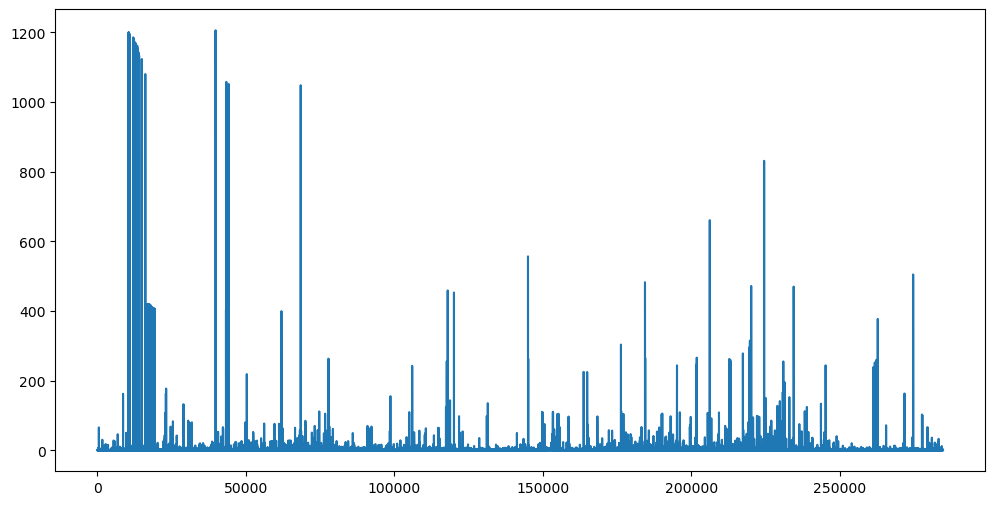

In [151]:
#Plot the loss for the legitimate transactions.
legit_scores.plot(figsize = (12, 6))

<AxesSubplot:>

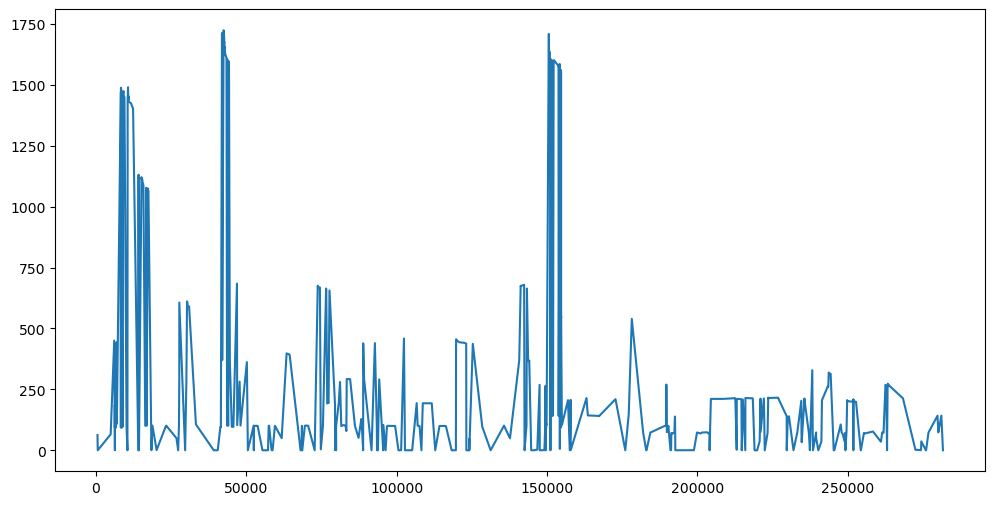

In [152]:
#Plot the loss for the fraudulent transactions.
fraud_scores.plot(figsize = (12, 6))

Plot a confusion matrix showing how well the model identifies legitimate and fraudulent transactions with a loss threshold of 200. In other words, assume that a transaction with a loss of less than 200 is legitimate while a transaction with a loss of 200 or more is fraudulent, and see how the model performs.

Text(113.9222222222222, 0.5, 'True label')

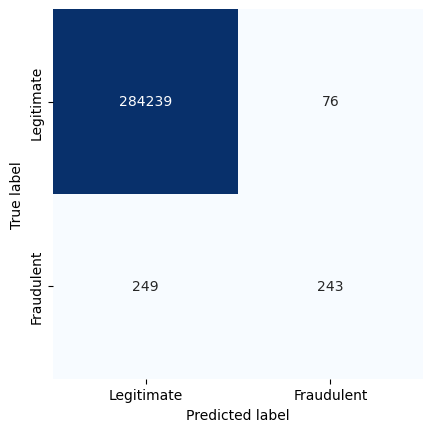

In [153]:
threshold = 200

true_neg = legit_scores[legit_scores < threshold].count()
false_pos = legit_scores[legit_scores >= threshold].count()
true_pos = fraud_scores[fraud_scores >= threshold].count()
false_neg = fraud_scores[fraud_scores < threshold].count()

labels = ['Legitimate', 'Fraudulent']
mat = [[true_neg, false_pos], [false_neg, true_pos]]

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted label')
plt.ylabel('True label')

Text(113.9222222222222, 0.5, 'True label')

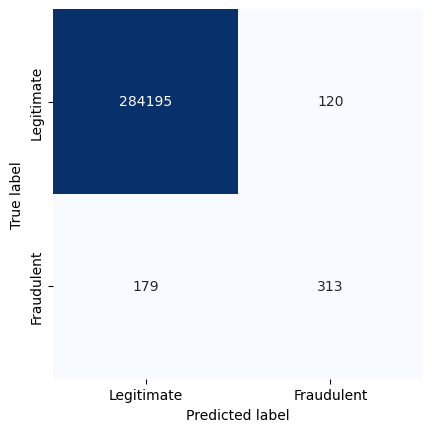

In [154]:
threshold = 100

true_neg = legit_scores[legit_scores < threshold].count()
false_pos = legit_scores[legit_scores >= threshold].count()
true_pos = fraud_scores[fraud_scores >= threshold].count()
false_neg = fraud_scores[fraud_scores < threshold].count()

labels = ['Legitimate', 'Fraudulent']
mat = [[true_neg, false_pos], [false_neg, true_pos]]

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted label')
plt.ylabel('True label')

### using tsne to detect anomaly
reference https://www.datacamp.com/tutorial/introduction-t-sne

**KL Divergence**: KL divergence is a non-symmetric metric that measures the relative entropy or difference in information represented by two distributions. It can be thought of as measuring the distance between two data distributions showing how different the two distributions are from each other.

**t-SNE** defines a similar probability distribution over the points in the low-dimensional map, and it minimizes the Kullback–Leibler divergence (KL divergence) between the two distributions with respect to the locations of the points in the map.
https://towardsdatascience.com/understanding-kl-divergence-f3ddc8dff254 

How t-SNE works
The t-SNE algorithm finds the similarity measure between pairs of instances in higher and lower dimensional space. After that, it tries to optimize two similarity measures. It does all of that in three steps. 

t-SNE models a point being selected as a neighbor of another point in both higher and lower dimensions. It starts by calculating a pairwise similarity between all data points in the high-dimensional space using a Gaussian kernel. The points that are far apart have a lower probability of being picked than the points that are close together. 
Then, the algorithm tries to map higher dimensional data points onto lower dimensional space while preserving the pairwise similarities. 
It is achieved by minimizing the divergence between the probability distribution of the original high-dimensional and lower-dimensional. The algorithm uses gradient descent to minimize the divergence. The lower-dimensional embedding is optimized to a stable state.
The optimization process allows the creation of clusters and sub-clusters of similar data points in the lower-dimensional space that are visualized to understand the structure and relationship in the higher-dimensional data. 

#### tsne does not work

## 3. Create more data to balance the dataset: later

imbalance dataset: create more data https://medium.com/sfu-cspmp/surviving-in-a-random-forest-with-imbalanced-datasets-b98b963d52eb

## 4. One class SVM
* One class SVM: p. 104
https://slideplayer.com/slide/14537332/ 
Presentation Pdf download https://www.eecis.udel.edu/~shatkay/Course/papers/UOSVMAlliferisWithoutTears.pdf
* need to finetune parameter \nu=% of outliers
* python: https://towardsdatascience.com/support-vector-machine-svm-for-anomaly-detection-73a8d676c331
* https://medium.com/grabngoinfo/one-class-svm-for-anomaly-detection-6c97fdd6d8af
* google colab: run much faster: https://colab.research.google.com/drive/1CZQCXB7bp3Zi928_y7enobIoJ9RSK09S#scrollTo=304cthOcj7CI

In [27]:
df_=df.drop(['Time', 'Class'], axis=1)

In [28]:
# model specification
#nu=0.03 means outliers=3%
model = OneClassSVM(kernel = 'rbf', gamma = 0.001, nu = 0.03).fit(df_)

In [30]:
# prediction
y_pred = model.predict(df_)


In [31]:
# filter outlier index
outlier_index = where(y_pred == -1) 
# filter outlier values
outlier_values = df_.iloc[outlier_index]
outlier_values

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
51,-1.004929,-0.985978,-0.038039,3.710061,-6.631951,5.122103,4.371691,-2.006868,-0.278736,-0.230873,...,-0.001980,1.393406,-0.381671,0.969719,0.019445,0.570923,0.333278,0.857373,-0.075538,1402.95
89,-0.773293,-4.146007,-0.932038,0.027094,-1.698307,0.460188,0.737344,-0.314216,-0.842673,0.017276,...,2.442782,0.890978,0.026123,-1.134769,-0.654958,0.098386,-0.209150,-0.171709,0.208057,1142.02
134,-1.897331,0.955626,0.052543,1.276656,-3.323084,3.229911,1.029631,1.515607,-0.059627,-1.461403,...,-0.832630,0.128416,0.776078,0.477537,-0.608981,-1.120892,-0.413851,0.061399,-0.187964,552.18
140,-5.101877,1.897022,-3.458034,-1.277543,-5.517758,2.098366,3.329603,1.250966,0.271501,-0.305483,...,-1.270478,-0.871744,-0.678879,-0.555900,-0.761660,0.066611,0.767227,0.731634,-0.860310,919.60
150,-1.640014,-0.479831,1.613630,2.997979,-3.803788,5.051812,3.315254,-0.303785,0.671395,0.744104,...,0.124193,-0.367933,0.641891,-0.405779,-1.268700,0.494090,0.610967,0.608993,-0.410034,937.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284645,-2.521887,1.720516,-0.890967,4.516690,0.103394,0.410173,2.650895,-0.619516,-2.625264,2.078730,...,-1.053307,-0.027684,1.038627,-0.592359,0.038390,1.155201,0.856059,-0.970223,-0.698047,302.10
284712,0.470194,-1.619056,-2.258427,4.440719,0.202024,-0.458243,1.970565,-0.665303,-1.630737,1.133310,...,1.347241,0.603016,0.104952,-0.716836,0.121688,0.170587,0.082567,-0.218942,0.070955,787.95
284733,-1.353026,0.289945,0.173684,-3.780442,-1.173016,-0.159307,3.009433,-1.544902,1.422788,-2.512103,...,-0.639386,0.415421,-0.701799,-0.144663,1.056709,1.074381,-1.129447,0.033781,-0.325899,405.09
284795,-12.516732,10.187818,-8.476671,-2.510473,-4.586669,-1.394465,-3.632516,5.498583,4.893089,8.655320,...,3.490065,-0.944759,-1.565026,0.890675,-1.253276,1.786717,0.320763,2.090712,1.232864,9.87


In [32]:
len(df)

284807

In [33]:
284807*0.03

8544.21

In [34]:
df_outliers=df.iloc[outlier_index]

In [35]:
df_outliers[df_outliers['Class']==1]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
6331,7526.0,0.008430,4.137837,-6.240697,6.675732,0.768307,-3.353060,-1.631735,0.154612,-2.795892,...,0.364514,-0.608057,-0.539528,0.128940,1.488481,0.507963,0.735822,0.513574,1.00,1
6334,7535.0,0.026779,4.132464,-6.560600,6.348557,1.329666,-2.513479,-1.689102,0.303253,-3.139409,...,0.370509,-0.576752,-0.669605,-0.759908,1.605056,0.540675,0.737040,0.496699,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268375,163181.0,-5.238808,0.623013,-5.784507,1.678889,-0.364432,-0.477295,-4.276132,-0.695173,-2.971644,...,-0.326140,1.509239,-0.215966,-0.245727,0.893041,0.865758,0.854657,-0.964482,39.98,1
274382,165981.0,-5.766879,-8.402154,0.056543,6.950983,9.880564,-5.773192,-5.748879,0.721743,-1.076274,...,0.880395,-0.130436,2.241471,0.665346,-1.890041,-0.120803,0.073269,0.583799,0.00,1
276864,167338.0,-1.374424,2.793185,-4.346572,2.400731,-1.688433,0.111136,-0.922038,-2.149930,-2.027474,...,-0.870779,0.504849,0.137994,0.368275,0.103137,-0.414209,0.454982,0.096711,349.08,1
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1


### Conclusion: 
PCA works better than one class SVMs